## Tugas 04 - Naive Bayes & Bayessian Network
<br>
Nama : Muh. Yusuf Syam<br>
NIM : H071191044

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Penjelasan Dataset

Dataset dari penumpang titanic

Terdiri dari:
<br>
* pclass: Kelas penumpang
* sex: Jenis kelamin penumpang
* age: umur penumpang
* survived (target): apakah penumpang selamat atau tidak

In [2]:
data= pd.read_csv('titanic_data_set.csv')[['pclass','sex','age','survived']]
data.head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [3]:
data.shape

(891, 4)

In [4]:
data.info

<bound method DataFrame.info of      pclass     sex   age  survived
0         3    male  22.0         0
1         1  female  38.0         1
2         3  female  26.0         1
3         1  female  35.0         1
4         3    male  35.0         0
..      ...     ...   ...       ...
886       2    male  27.0         0
887       1  female  19.0         1
888       3  female   NaN         0
889       1    male  26.0         1
890       3    male  32.0         0

[891 rows x 4 columns]>

In [5]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

## Preprocessing

1. Handling Missing Value

In [6]:
data.isnull().sum()

pclass        0
sex           0
age         177
survived      0
dtype: int64

In [7]:
data['age']= data['age'].fillna(data['age'].mean())
data.isnull().sum()

pclass      0
sex         0
age         0
survived    0
dtype: int64

2. Categorical Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

data['sex']= LabelEncoder().fit_transform(data['sex'])

data.head()

,pclass,sex,age,survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0


## Contoh visualisasi jumlah penumpang yang selamat berdasarkan kelas tiket

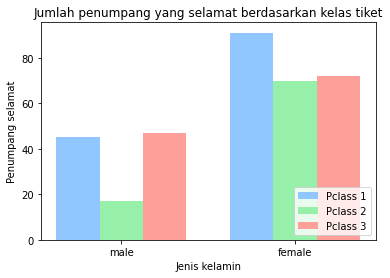

In [9]:
x_indexes= np.arange(len(data['sex'].unique()))
width= 0.25

plt.style.use('seaborn-pastel')

plt.bar(x_indexes-width, [(data[(data['survived']==1) & (data['sex']==i) & (data['pclass']==1)].count()[0]) for i in data['sex'].unique()], width=width, label='Pclass 1')
plt.bar(x_indexes, [(data[(data['survived']==1) & (data['sex']==i) & (data['pclass']==2)].count()[0]) for i in data['sex'].unique()], width=width, label='Pclass 2')
plt.bar(x_indexes+width, [(data[(data['survived']==1) & (data['sex']==i) & (data['pclass']==3)].count()[0]) for i in data['sex'].unique()], width=width, label='Pclass 3')

plt.legend(loc='lower right')
plt.xticks(ticks=x_indexes, labels=['male','female'])

plt.xlabel('Jenis kelamin')
plt.ylabel('Penumpang selamat')
plt.title('Jumlah penumpang yang selamat berdasarkan kelas tiket')

plt.show()

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

x = data.drop(["survived"], axis = 1)
y = data['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

len(x_test), len(x_train)

(179, 712)

## Klasifikasi Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb_model= GaussianNB()
gnb_model.fit(x_train, y_train)

y_pred = gnb_model.predict(x_test)
y_pred[:20]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
      dtype=int64)

Melihat nilai sebenarnya sebelum diprediksi

In [12]:
y_actual = np.array(y_test)
y_actual[:20]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

Melihat berapa probabilitas hasil prediksi data testing

In [13]:
gnb_model.predict_proba(x_test)

array([[0.12318705, 0.87681295],
       [0.91775193, 0.08224807],
       [0.58749526, 0.41250474],
       [0.58479291, 0.41520709],
       [0.91464481, 0.08535519],
       [0.85353427, 0.14646573],
       [0.13480733, 0.86519267],
       [0.1198243 , 0.8801757 ],
       [0.19453654, 0.80546346],
       [0.23003793, 0.76996207],
       [0.15770563, 0.84229437],
       [0.22741646, 0.77258354],
       [0.04007581, 0.95992419],
       [0.91120271, 0.08879729],
       [0.04048428, 0.95951572],
       [0.12212194, 0.87787806],
       [0.03807907, 0.96192093],
       [0.58649944, 0.41350056],
       [0.25122473, 0.74877527],
       [0.83847808, 0.16152192],
       [0.23178849, 0.76821151],
       [0.0784535 , 0.9215465 ],
       [0.85148668, 0.14851332],
       [0.85349101, 0.14650899],
       [0.84381204, 0.15618796],
       [0.91193696, 0.08806304],
       [0.90716568, 0.09283432],
       [0.02908037, 0.97091963],
       [0.90145013, 0.09854987],
       [0.91775193, 0.08224807],
       [0.

## Nilai Akurasi

In [14]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8044692737430168


## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_pred, y_test)
cm

array([[97, 18],
       [17, 47]], dtype=int64)

Visualisasi confusion matrix

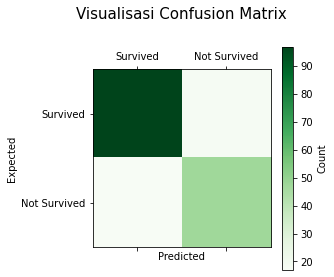

In [16]:
plt.matshow(cm, cmap='Greens')

plt.colorbar().set_label('Count')

plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.xticks(ticks=[0,1], labels=['Survived','Not Survived'])
plt.yticks(ticks=[0,1], labels=['Survived','Not Survived'])

plt.title('Visualisasi Confusion Matrix', size=15, pad=50)
plt.show()

## Bayesian Network

In [17]:
import networkx as nx
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [18]:
data.head(3)

,pclass,sex,age,survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1


In [19]:
data.describe()

,pclass,sex,age,survived
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.383838
std,0.836071,0.477990,13.002015,0.486592
min,1.000000,0.000000,0.420000,0.000000
25%,2.000000,0.000000,22.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000
75%,3.000000,1.000000,35.000000,1.000000
max,3.000000,1.000000,80.000000,1.000000


Umur memengaruhi jenis kelamin dalam hal selamat atau tidaknya penumpang <br>
Kelas penumpang juga memengaruhi selamat atau tidaknya seorang penumpang

In [20]:
data["ageCat"] = data["age"].apply(lambda x: 'child' if x<=15 else 'adult' if 15<x<60 else 'old')
data["sexCat"] = data["sex"].apply(lambda x: 'female' if x==0 else 'male')
data["pclassCat"] = data["pclass"].apply(str)

data["ageCat"].value_counts().sort_index()

adult    782
child     83
old       26
Name: ageCat, dtype: int64

In [21]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        prob = pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
        if parent2==None:
            prob=pd.crosstab(data[parent1], data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
        else:
            prob=pd.crosstab([data[parent1], data[parent2]], data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error menghitung frekuensi probabilitas")
    return prob

In [22]:
age = BbnNode(Variable(0, 'age', ['child','adult','old']), probs(data, child="ageCat"))
sex = BbnNode(Variable(1, 'sex', ['male','female']), probs(data, child="sexCat", parent1="ageCat"))
pclass = BbnNode(Variable(2, 'pclass', ['1','2' '3']), probs(data, child="pclassCat"))
survived = BbnNode(Variable(3, 'Survived', ['No', 'Yes']), probs(data, child="survived", parent1="sexCat", parent2="pclassCat"))

In [23]:
bbn = Bbn() \
      .add_node(age) \
      .add_node(sex) \
      .add_node(pclass) \
      .add_node(survived) \
      .add_edge(Edge(age, sex, EdgeType.DIRECTED)) \
      .add_edge(Edge(sex, survived, EdgeType.DIRECTED)) \
      .add_edge(Edge(pclass, survived, EdgeType.DIRECTED))

# Convert BBN to Join Tree
join_tree = InferenceController.apply(bbn)

(-1.32, 1.32, -1.48, 2.48)

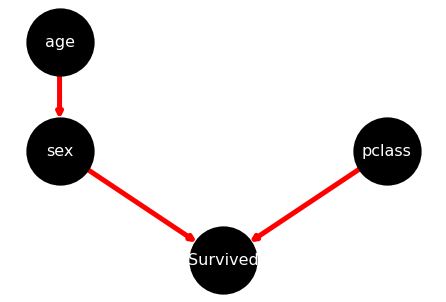

In [38]:
# Set node position
pos = {0: (-1, 2), 2:(1,0.5), 1:(-1,0.5), 3:(0,-1)}

# Set Options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000, 
    "node_color": "black",
    "edgecolors": "black",
    "edge_color": "red",
    "font_color": "white",
    "linewidths": 5,
    "width": 5}

# Generate Graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")

Plot probabilitas keselamatan penumpang

In [25]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
print_probs()

Node: 1|sex|male,female
Values:
1=male|0.35241
1=female|0.64759
----------------
Node: 0|age|child,adult,old
Values:
0=child|0.87767
0=adult|0.09315
0=old|0.02918
----------------
Node: 2|pclass|1,23
Values:
2=1|0.54000
2=23|0.46000
----------------
Node: 3|Survived|No,Yes
Values:
3=No|0.38173
3=Yes|0.61827
----------------
